In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
pd.options.display.max_columns= None
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
# Path to the file (update this with the actual path to your file)
file_path = 'C:/Users/pc/chess_game_metrics.csv'

# Read the CSV file into a pandas DataFrame
data = pd.read_csv(file_path)


In [3]:
data.head()

,Time_Spent_Per_Move,Overall_Game_Duration,Invalid_Moves
0,23.097867,403.716313,3
1,57.092144,2400.154357,2
2,44.187643,1337.374738,0
3,36.320851,1978.283281,3
4,10.205100,3294.969364,3


<Axes: >

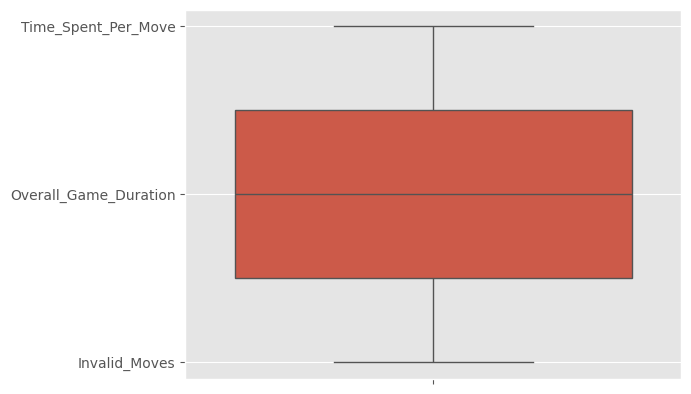

In [10]:
sns.boxplot(data =list(data.columns), orient = 'v')

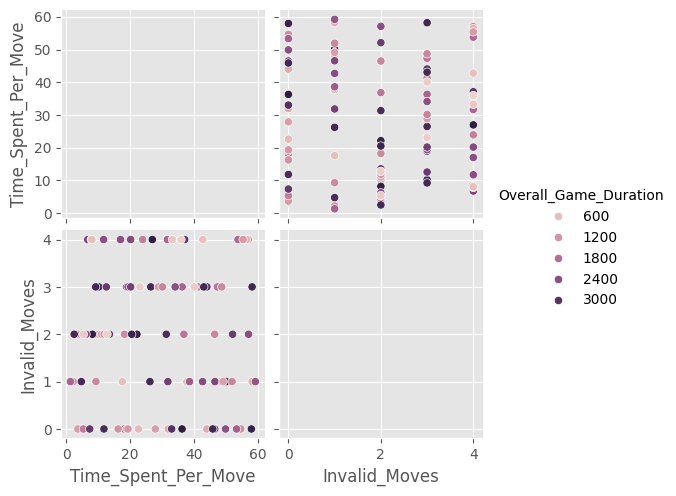

In [11]:
sns.pairplot(data, hue='Overall_Game_Duration')
plt.show()

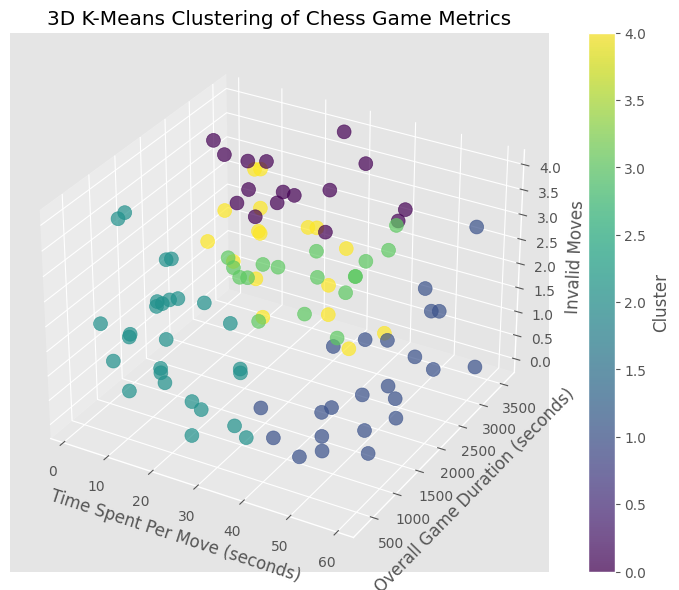

In [28]:
# Step 2: Standardize the data (important for K-Means)
scaler = StandardScaler()
scaled_data= scaler.fit_transform(data)

# Step 3: Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# Step 4: 3D Visualization of the clusters
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot in 3D space
ax.scatter(data['Time_Spent_Per_Move'], data['Overall_Game_Duration'], data['Invalid_Moves'], 
           c=data['Cluster'], cmap='viridis', s=100, alpha=0.7)

# Labels and title
ax.set_xlabel('Time Spent Per Move (seconds)')
ax.set_ylabel('Overall Game Duration (seconds)')
ax.set_zlabel('Invalid Moves')
ax.set_title('3D K-Means Clustering of Chess Game Metrics')

# Show color bar
cbar = plt.colorbar(ax.collections[0], ax=ax, orientation='vertical')
cbar.set_label('Cluster')

# Show plot
plt.show()

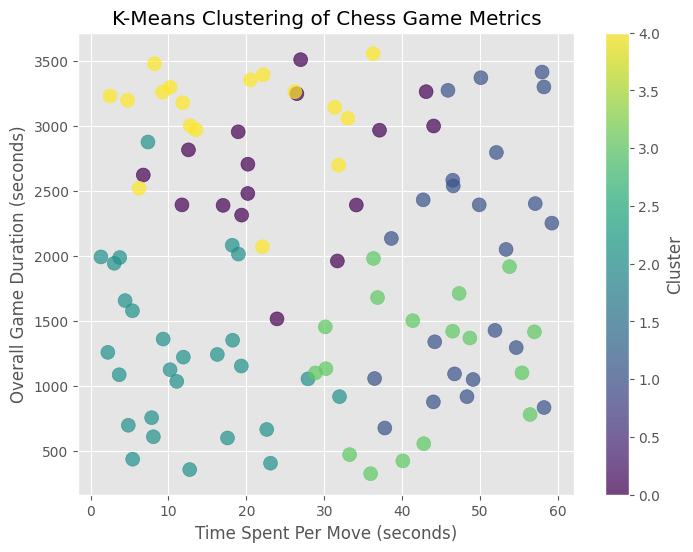

In [31]:
plt.figure(figsize=(8, 6))
plt.scatter(data['Time_Spent_Per_Move'], data['Overall_Game_Duration'], c=data['Cluster'], cmap='viridis', s=100, alpha=0.7)
plt.title('K-Means Clustering of Chess Game Metrics')
plt.xlabel('Time Spent Per Move (seconds)')
plt.ylabel('Overall Game Duration (seconds)')
plt.colorbar(label='Cluster')
plt.show()


In [33]:
# Step 4: Classify players and assign tailored challenges
def assign_challenges(row):
    if row['Cluster'] == 0:  # Beginner cluster
        return "Challenge: Improve decision-making speed with time-limited puzzles."
    elif row['Cluster'] == 1:  # Intermediate cluster
        return "Challenge: Work on reducing invalid moves with penalty-based scenarios."
    else:  # Advanced cluster
        return "Challenge: Solve complex endgame scenarios with time and move limits."

data['Tailored_Challenge'] = data.apply(assign_challenges, axis=1)

# Display the results with the challenges assigned
print(data[['Time_Spent_Per_Move', 'Overall_Game_Duration', 'Invalid_Moves', 'Cluster', 'Tailored_Challenge']].head())

   Time_Spent_Per_Move  Overall_Game_Duration  Invalid_Moves  Cluster  \
0            23.097867             403.716313              3        2   
1            57.092144            2400.154357              2        1   
2            44.187643            1337.374738              0        1   
3            36.320851            1978.283281              3        3   
4            10.205100            3294.969364              3        4   

                                  Tailored_Challenge  
0  Challenge: Solve complex endgame scenarios wit...  
1  Challenge: Work on reducing invalid moves with...  
2  Challenge: Work on reducing invalid moves with...  
3  Challenge: Solve complex endgame scenarios wit...  
4  Challenge: Solve complex endgame scenarios wit...  


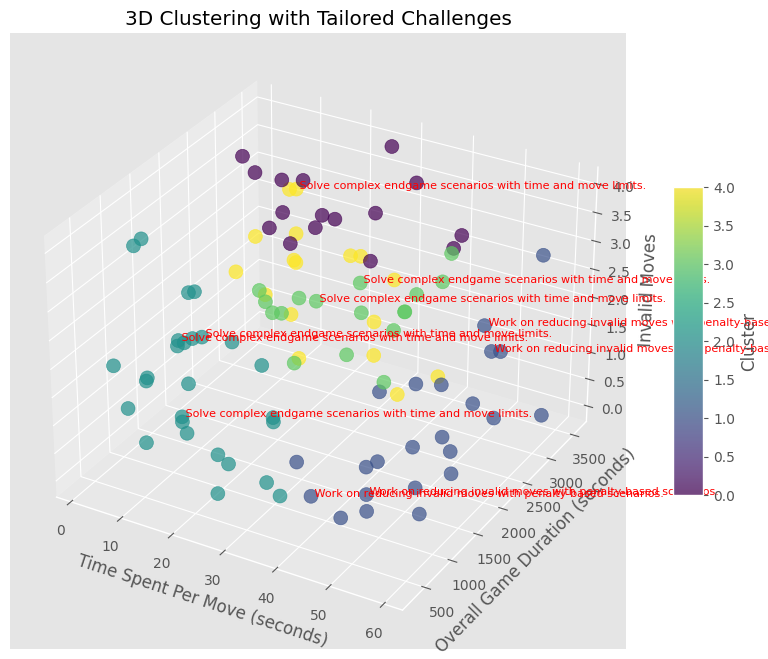

In [37]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with cluster color coding
scatter = ax.scatter(
    data['Time_Spent_Per_Move'], 
    data['Overall_Game_Duration'], 
    data['Invalid_Moves'], 
    c=data['Cluster'], cmap='viridis', s=100, alpha=0.7
)

# Add labels for the axes
ax.set_xlabel('Time Spent Per Move (seconds)')
ax.set_ylabel('Overall Game Duration (seconds)')
ax.set_zlabel('Invalid Moves')

# Add a color bar
cbar = plt.colorbar(scatter, ax=ax, shrink=0.5, aspect=10)
cbar.set_label('Cluster')

# Add title
ax.set_title('3D Clustering with Tailored Challenges')

# Optional: Annotate with challenges (first 10 points for clarity)
for i in range(10):  # Display annotations for the first 10 points
    ax.text(
        data['Time_Spent_Per_Move'].iloc[i], 
        data['Overall_Game_Duration'].iloc[i], 
        data['Invalid_Moves'].iloc[i], 
        data['Tailored_Challenge'].iloc[i].split(":")[1],  # Simplify annotation text
        fontsize=8, color='red'
    )

plt.show()
